# Algoritmo 1: Contornos y aproximación polinomial

En primer lugar se importan todos los paquetes y módulos necesarios

In [2]:
import numpy as np
import cv2 #This is openCV
import matplotlib.pyplot as plt 

Se sube la imagen y se pasa de formato BGR a escala de grises

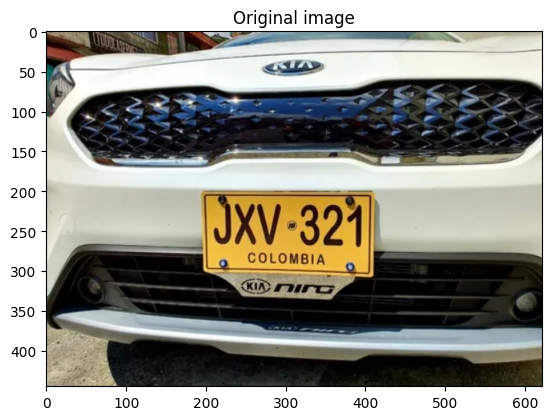

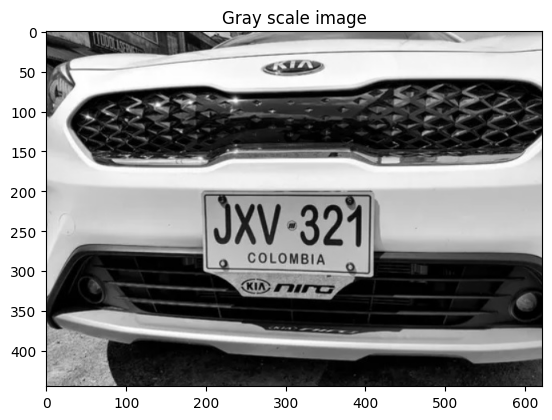

In [6]:
plate_original = cv2.imread('Fig/Placa1.jpg', cv2.IMREAD_COLOR)
plt.title("Original image")
plt.imshow(cv2.cvtColor(plate_original, cv2.COLOR_BGR2RGB))
plt.show()
plate_gray = cv2.cvtColor(plate_original, cv2.COLOR_BGR2GRAY)
plt.title("Gray scale image")
plt.imshow(cv2.cvtColor(plate_gray, cv2.COLOR_BGR2RGB))
plt.show()

Se aplica un filtro blur bilateral que mantiene los bordes presentes en la imagen

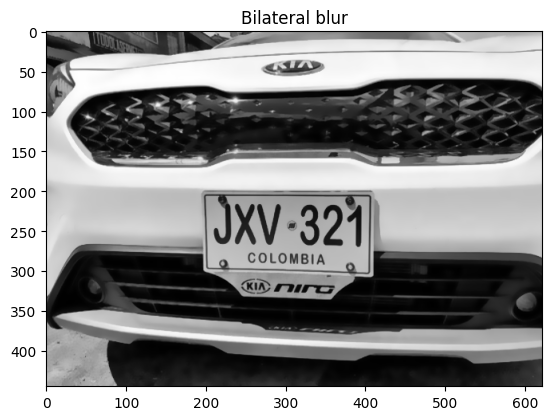

In [5]:
bilateral_blur = cv2.bilateralFilter(plate_gray,11,17,17)
plt.title("Bilateral blur")
plt.imshow(cv2.cvtColor(bilateral_blur, cv2.COLOR_BGR2RGB))
plt.show()

Se aplica el algoritmo de Canny para detectar los bordes

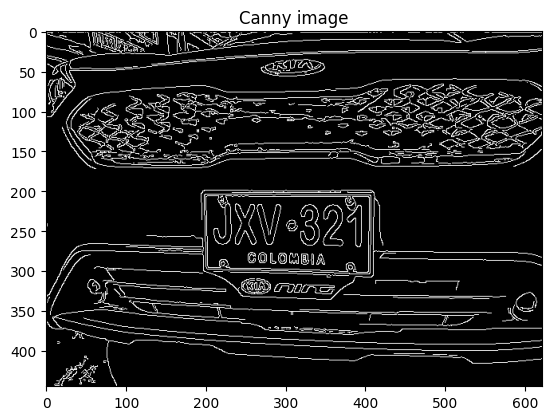

In [7]:
edged = cv2.Canny(bilateral_blur, 30, 150)
plt.title("Canny image")
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
plt.show()

Se hallan los contornos con la función *cv2.findContours*. Debido a que la zona de la placa es una zona rectangular, se seleccionan aquellos contornos definidos por 4 puntos. 

In [8]:
contours, hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

location = []
for cnt in contours:
  approx = cv2.approxPolyDP(cnt, 8, True)
  if(len(approx) == 4):
    location.append(approx)

Se lista el total de contornos definidos por 4 puntos que se encontraron.

In [9]:
print(f"Posibles opciones: {len(location)}")

Posibles opciones: 24


Se ordenan los contornos por el área que encierran de manera descendente y se seleccionado el contorno cque encierra la mayor área.

In [10]:
location = sorted(location, key = cv2.contourArea, reverse = True)
selected_contour = 0

Se crea una imagen totalmente blanca para mostrar el contorno seleccionado (posible ubicación de la zona de la placa).

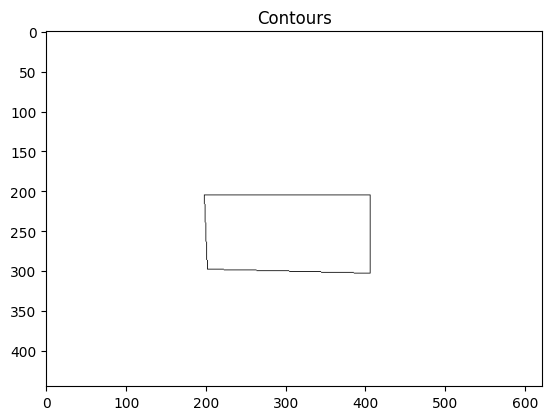

In [11]:
white_background = np.zeros_like(plate_gray) + 255

cv2.drawContours(white_background, location, selected_contour, (0), 1)
plt.title("Contours")
plt.imshow(cv2.cvtColor(white_background, cv2.COLOR_BGR2RGB))
plt.show()

Se aplica una máscara a la imagen original teniendo el contorno seleccionado.

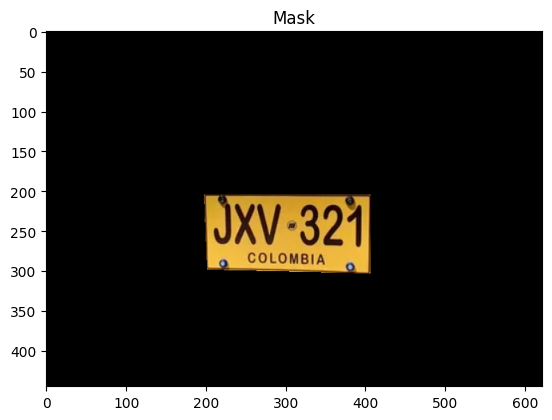

In [12]:
mask = np.zeros_like(plate_gray)
new_image = cv2.drawContours(mask, location, selected_contour, 255, -1)
plt.title("Mask")
new_image = cv2.bitwise_and(plate_original, plate_original, mask = mask)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

Se selecciona únicamente la zona del contorno seleccionado en la imagen original como posible placa

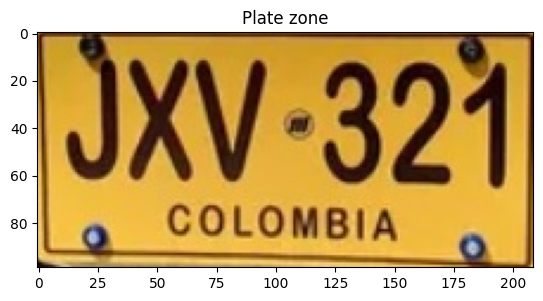

In [13]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
plate_zone = plate_original[x1:x2+1, y1:y2+1]
plt.imshow(cv2.cvtColor(plate_zone, cv2.COLOR_BGR2RGB))
plt.title("Plate zone")
plt.show()

Esta imagen es después pasada por el algoritmo de verificación y así comprobar si efectivamente se trata de una placa. 